# Doğrusal Olmayan Regresyon-Finans Datası

In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

# KNN 

*** EN YAKIN KOMŞU(KNN): Tahminler gözlemler benzerliğine göre yapılır.Sınıflandırma ve regresyon problemlerinde kullanılan bir algoritmadır.

***Bağımlı değişken değerini,kendisine en benzer gözlemlerine bakarak tahmin etmeye çalışılır.

In [2]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [6]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Burada bazı parametreler verilmiştir.Komşuluk parametresi değeri=5, farklı komşuluk sayılarına farklı değerler elde edilecektir.



In [7]:
knn_model.n_neighbors

5

In [8]:
knn_model.effective_metric_

'euclidean'

# TAHMİN

In [9]:
y_pred = knn_model.predict(X_test) 
#X test setine yönelik olarak y tahmin değerlerini gösterir.

In [10]:
np.sqrt(mean_squared_error(y_test, y_pred))  #Test hatası

21.341319517736117

In [11]:
RMSE = []       #Farklı k değerlerine karşılık tahmin değerimin nasıl değiştiğini gözlemliyorum.

for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    RMSE.append(rmse) 
    print("k =" , k , "için RMSE değeri: ", rmse)

    #Eğitim datası üzerinde hata gözlemleme işlemi yaptık.

k = 1 için RMSE değeri:  0.0
k = 2 için RMSE değeri:  10.576655411093668
k = 3 için RMSE değeri:  13.236326617796417
k = 4 için RMSE değeri:  14.914983204514881
k = 5 için RMSE değeri:  16.06547949859019
k = 6 için RMSE değeri:  17.115122761747287
k = 7 için RMSE değeri:  17.834609278634616
k = 8 için RMSE değeri:  18.36383651330056
k = 9 için RMSE değeri:  18.864628334465873
k = 10 için RMSE değeri:  19.294600110162516


# MODEL TUNING

GridSearch CV yöntemiyle optimum k sayısını belirlemeye çalıştığımız bölüm. 

Bir olası veri seti verilip,tüm olası kombinasyonlarının denenmesi anlamındadır.İki parametre olursa birbiriyle çarpıştırılarak (cross validation) kombinasyonlar bulunur.

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
knn_params = {'n_neighbors': np.arange(1,30,1)}

In [14]:
np.arange(1,30,1)  #1'den 30'a kadar k değerleri ürettik.

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [15]:
knn = KNeighborsRegressor()

In [16]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)
#KNN cross validation modelinin nesnesini tanımlamış olduk.

In [17]:
knn_cv_model.fit(X_train, y_train)
#Modeli fit ettik. Uygun olan parametreler denendi.

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [23]:
knn_cv_model.best_params_["n_neighbors"] #En uygun parametre değeri 3.

3

In [24]:
RMSE = [] 
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train) 
    rmse = np.sqrt(mean_squared_error(y_train,y_pred)) 
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, X_train, y_train, cv=10, 
                                         scoring = "neg_mean_squared_error").mean())
    RMSE.append(rmse) 
    RMSE_CV.append(rmse_cv)
    print("k =" , k , "için RMSE değeri: ", rmse, "RMSE_CV değeri: ", rmse_cv )


k = 1 için RMSE değeri:  0.0 RMSE_CV değeri:  21.605578153710848
k = 2 için RMSE değeri:  10.576655411093668 RMSE_CV değeri:  20.508389728933956
k = 3 için RMSE değeri:  13.236326617796417 RMSE_CV değeri:  20.354295392665236
k = 4 için RMSE değeri:  14.914983204514881 RMSE_CV değeri:  20.67323245878391
k = 5 için RMSE değeri:  16.06547949859019 RMSE_CV değeri:  21.083571156210244
k = 6 için RMSE değeri:  17.115122761747287 RMSE_CV değeri:  21.170756180627567
k = 7 için RMSE değeri:  17.834609278634616 RMSE_CV değeri:  21.380402206148933
k = 8 için RMSE değeri:  18.36383651330056 RMSE_CV değeri:  21.665331982967565
k = 9 için RMSE değeri:  18.864628334465873 RMSE_CV değeri:  21.960144262556618
k = 10 için RMSE değeri:  19.294600110162516 RMSE_CV değeri:  22.174975176199457


*Burada RMSE değeri bize test ve train üzerinden yapılan hata karelerinin ortalamasını gösterir.10-19 arasında dağılır.

*RMSE_CV değeri ise ,Valide edilmiş model üzerinden elde edilen hatalar.Eğitim üzerinedir. Bu değer 20-22 arasında dağılmıştır. Daha doğru değerleri gösterir çünkü aralık daha dardır.

In [25]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [26]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [27]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

20.684951569847392

***Tuned edilmiş final KNN modeliyle elde edilen test hatası 20 çıktı.

# Support Vector Regression (SVR)

Destek vektör regresyonu: 
Amaç burada bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru veya eğriyi belirlemek.

***Sınıflandırma prob ve regresyon problemlerine. Güçlü ve esnek bir model.

Doğrusal SVR 

In [22]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [24]:
X_train = pd.DataFrame(X_train["ind_412"])
X_test = pd.DataFrame(X_test["ind_412"])

#Gedef değişkenim 50_target,onunla ind_412 değişkeni arasında bir değerlendirme yapacağım.

In [25]:
from sklearn.svm import SVR

In [26]:
svr_model = SVR("linear").fit(X_train, y_train) #Doğrusal SVR modeli fit ettik.

In [27]:
svr_model.predict(X_train)[0:5]  #X train için tahmin değerleri oluşturuldu.

array([-34.24065586, -34.23605663, -34.2368698 , -34.2342238 ,
       -34.21994807])

In [28]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -34.225854851292276 + 2.3921461080000004 x


In [29]:
X_train["ind_412"][0:1]

5059   -0.006187
Name: ind_412, dtype: float64

In [30]:
-34.225854851292276 + 2.3921461080000004 * -0.006187   # Bu değerin in27 deki ilk değere eşit olması gerekiyor.Çünkü tahmin edilen değer.

-34.24065505926247

Bu SVR modelinin bize sağladığı tahmini değer.

In [31]:
y_pred = svr_model.predict(X_train)

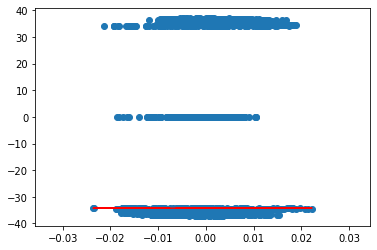

In [32]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r")

In [33]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -3.0785993964955427 + 844.8212812947367 x


In [34]:
-3.0785993964955427 + 844.8212812947367* -0.006187

-8.305508663866078

Bu bize lineer regresyonun verdiği tahmin değeri.Üstte SVR modeliyle tahmin ettiğimizde değer 34 çıktı burada 8 çıktı.Buradaki fark önem taşır.

Bu fark için iki denklemi üst üste koyarak aralarındaki ilişkiye bakabiliriz.

Text(0, 0.5, '50_target')

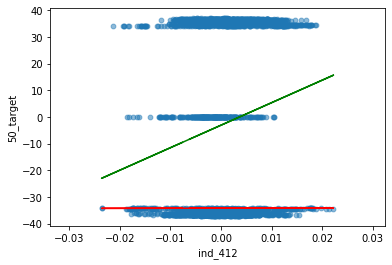

In [35]:
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("ind_412")
plt.ylabel("50_target")

***Kırmızı ve yeşil çizgileri yorumlarsak,doğrusal model yani lineer olan yeşil, SVR modeli kırmızıdır.Regresyon modeli daha yukarıdadır.Sebebi:SVR da aykırı gözlemler eğriyi yukarı doğru çeker.(En küçük kareler yönteminden dolayı.)

# TAHMİN

In [36]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -34.225854851292276 + 2.3921461080000004 x


In [37]:
svr_model.predict([[-0.006187]])

#Üstteki SVR modeli tahmin edildi.

array([-34.24065506])

In [38]:
y_pred = svr_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.62429069622837

*Tuned edilmemiş bir modelde test hatası 46 bulundu.KNN yönteminde bu değer 20 idi.

In [40]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

# MODEL TUNING

In [41]:
svr_model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [43]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [44]:
pd.Series(svr_cv_model.best_params_)[0]

1.9000000000000001

In [45]:
svr_tuned = SVR("linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)


In [46]:
y_pred = svr_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test, y_pred))

46.63301075415382

#Burada tek bir değişken ile bağımlı değişkeni yanı burada 50_target değişkenini tahmin ediyoruz.Aşağıda ise daha fazla değişken ile bu tahmini yapıyoruz.Çok değişken ile açıklarsak hataların karesi düşer.

In [30]:
np.sqrt(mean_squared_error(y_test, y_pred))

23.82506517370464

# Doğrusal Olmayan SVR

In [5]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

In [6]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR('rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])

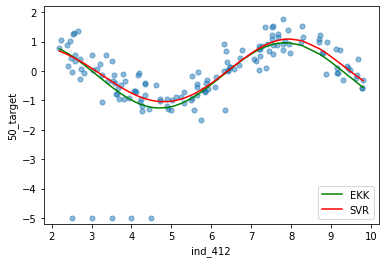

In [20]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, 'g')
plt_svr, = plt.plot(x_sim, svr_pred, color='r')
plt.xlabel("ind_412")
plt.ylabel("50_target")
plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc = 4);

***Doğrusal olmayan SVR ve lineer regresyonu karşılaştırmak için bu grafik çizildi.Suni bir veriseti oluşturduk aykırı gözlemleri ekledik.EKK ve SVR eğrisel bir formdadır.Aşağıdaki aykırı gözlemler EKK eğrisini aşağıya doğru çekmiştir.

In [21]:
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [23]:
svr_rbf = SVR("rbf").fit(X_train, y_train)
#SVR 'ı doğrusal olmayan bir formda kurduk.

# Tahmin

In [24]:
y_pred = svr_rbf.predict(X_test)

In [25]:
np.sqrt(mean_squared_error(y_test, y_pred))   
#Tüm değişkenleri kullanarak doğrusal olmayan formda model kurduk ve test hatası hesapladık.

23.82506517370464

# Model Tuning

In [26]:
svr_rbf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
svr_params = {"C": [0.01, 0.1,0.4,5,10,20,30,40,50]}
svr_cv_model = GridSearchCV(svr_rbf,svr_params, cv = 10)  
#svr_rbf modelini kullanarak optimum parametre değerlerini 10 katlı cross validation ile bulmasını söyledik.
svr_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.4, 5, 10, 20, 30, 40, 50]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [33]:
svr_cv_model.best_params_
#C değerinin 50 olduğu durumda optimum değere ulaşılır.Final modelini bunun üzerinden oluşturacağız.

{'C': 50}

In [28]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [31]:
svr_tuned = SVR("rbf", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, 
                                                                        y_train)
#Train üzerinden tuned edilmiş modeli kurduk.

In [32]:
y_pred = svr_tuned.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))


12.283123854447737

*En son aldığımız test hatası 23 idi. Şimdi hata 12'ye düştü.Tüm cross vaidation değerleri içinde en küçük hata terimine ulaşıldı.

*Bu şu anlama gelir:Eğer bu büyük gelseydi parametre setini değiştirip düzeltebilirdik.KNN değerinden iyi çıkmalıdır.Burada da daha düşük çıktı.

# Çok Katmanlı Algılayıcı

Yapay Sinir Ağları(YSA):
    İnsan beyninin bilgi işleme sistemini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen yöntemlerdir.

In [3]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

#Burada dönüştürme işlemine başladık.

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
X_train_scaled = scaler.transform(X_train)

In [10]:
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.neural_network import MLPRegressor

In [12]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train_scaled, y_train)

In [13]:
mlp_model
#Multi-linear perceptual

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Modele bakarsak daha fazla parametreye sahibiz.Gizli katman sayısı=100, Bu model içerisinden bazı değerlere ulaşmak istediğimizde aşağıdaki kodları kullanırız.

In [14]:
mlp_model.n_layers_  #Genel framework

4

In [15]:
mlp_model.hidden_layer_sizes #Genel framework'ün gizli katmanlarının içindeki nöron sayıları(elemanları) gösterir.

(100, 20)

# Tahmin

In [16]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 33.48467213,  36.79088152,  34.59975427,  34.17382388,
       -39.14508872])

In [17]:
y_pred = mlp_model.predict(X_test_scaled)

In [18]:
np.sqrt(mean_squared_error(y_test, y_pred))

11.153306261515374

Burada doğrusal olmayan SVR modelindeki hata terimlerine bakarsak 12 çıkmıştı.Şimdi 11 'e düştü.


# Model Tuning

In [19]:
mlp_model

#Gizli katman sayısına bakarsak mesela 1.katman 100,2.katman 20 nörondan oluşuyor.Bunlar arttırılabilir.

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 20), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [20]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(10,20,50)],  #Burada başka değerler de denenebilir.
             'activation': ['relu','logistic']}

In [21]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [ ]:
mlp_cv_model.fit(X_train_scaled, y_train)

In [ ]:
mlp_cv_model.best_params_

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [ ]:
mlp_tuned.fit(X_train_scaled, y_train)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CART(KARAR AĞACI MODELİ)

** Amacı karmaşık modelleri basit yapılara dönüştürmektir.Heterojen veri setleri de homojen bir şekilde gruplara ayrılır.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
X_train = pd.DataFrame(X_train["ind_412"])
X_test = pd.DataFrame(X_test["ind_412"])

#ind_412 değişkeninin 50_target değişkeniyle ilişkisine bakacağız.

In [5]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [6]:
?cart_model

In [7]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

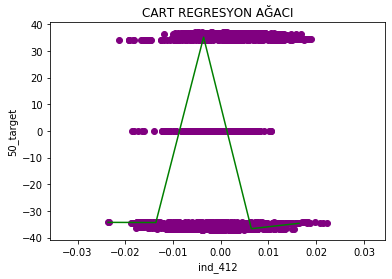

In [8]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'purple') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'green')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('ind_412') 
plt.ylabel('50_target') ;

**Burada bir regresyon problemini değişkenler bazında inceleyeceğiz.Burada bir parametre değişirse ağacın yapısının nasıl değiştiğini ele alacağız.

In [26]:
cart_model = DecisionTreeRegressor(max_leaf_nodes = 100)

In [27]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=100,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

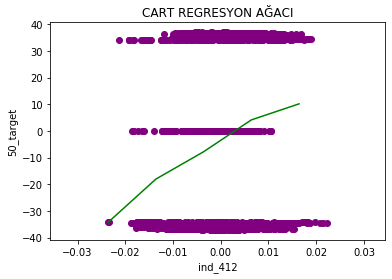

In [28]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'purple') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'green')  
plt.title('CART REGRESYON AĞACI')  
plt.xlabel('ind_412') 
plt.ylabel('50_target') ;

Algoritmanın parametrelerini değiştirerek,optimum parametreleri bulmaya çalışıyoruz.

In [ ]:
# plt.figure(figsize=(5,10))
tree.plot_tree(cart_model);

In [ ]:
#!pip install skompiler

In [ ]:
from skompiler import skompile

In [ ]:
print(skompile(cart_model.predict).to('python/code'))

# Tahmin 

In [29]:
x = [-0.006187]

In [30]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [31]:
cart_model.predict(X_test)[0:5]

array([  4.16796538, -35.09739446,  -2.55824725,   0.16162196,
        -3.23470869])

In [32]:
cart_model.predict([[-0.006187]])

array([-4.69261782])

In [33]:
y_pred =cart_model.predict(X_test)

In [34]:
np.sqrt(mean_squared_error(y_test, y_pred))

35.44668949689822

# Model Tuning

Üstte kurduğumuz CART modelinde bazı parametreleri değiştireceğiz.

In [107]:
cart_model = DecisionTreeRegressor(max_leaf_nodes= 2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [108]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.12377351270486

In [113]:
cart_params = {"min_samples_split": range(3,50),
               "max_leaf_nodes": range(2,10)}

In [114]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [115]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=2,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(3, 50)},
             pre_dispatch='2*n_jobs', r

In [116]:
cart_cv_model.best_params_

{'max_leaf_nodes': 2, 'min_samples_split': 3}

In [121]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 2, min_samples_split = 3)

In [122]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=2,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [123]:
y_pred = cart_tuned.predict(X_test)

In [124]:
np.sqrt(mean_squared_error(y_test, y_pred))

34.12377351270486

**Burada tüm değişkenler ile model tahmini yaptık ve test hatasını 34 bulduk.Önceki değeri 46 idi. 

**Veri setine birden fazla değişken eklendiğinde bağımlı değişkendeki değişim açıklanabiliyorsa hata teriminin düştüğünü gözlemleriz.

In [ ]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

# Bagged Trees Regresyon

Temeli boostrap yöntemiyle oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesidir.

** Bagged modeliyle veri setinin içerisinde birden fazla ağacı aynı anda oluşturarak tahmin sergiler.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)


In [4]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

#bag_model adında yeni bir model kurduk.
#n_estimators= 10 tane ağaç oluşturulacak demektir.

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [5]:
bag_model.n_estimators

10

In [6]:
bag_model.estimators_

#Burada bulduklarımızın her birisi birbirinden farklı ağaçlardır.

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=492213219, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1640772457, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_dec

In [7]:
bag_model.estimators_samples_

#Her bir ağaçta kaç tane örnek vardır bunu gösteriyor.

[array([4115,  617,  161, ..., 2878,  603, 4267]),
 array([ 387, 4403, 2675, ..., 4390, 2039, 3844]),
 array([1428, 4425,  325, ..., 2995, 1732,  613]),
 array([4469, 3054,  244, ..., 2559, 2948, 4586]),
 array([1476,  960, 2082, ..., 4103, 1250, 3726]),
 array([3056, 2824, 2837, ...,  892,  969, 2533]),
 array([2733, 4053, 1116, ..., 4051, 4103, 2948]),
 array([2177,  629,  276, ..., 1447,  888,   55]),
 array([2845, 3674, 2312, ..., 2889, 1706, 3190]),
 array([4251, 3939,  169, ...,  339, 1476,  120])]

In [8]:
bag_model.estimators_features_

#Her bir ağacın bağımsız değişkenlerine ulaşmak istersek.Tüm ağaçlarda kullanılan değişken ve indexleeri belirledik.

[array([ 47,  90,  64,  74,  72, 116,  19,  63,  49,  20,  42, 126,  91,
         67, 130,  70,  68,  39,  71,  83, 109, 123,  40,  36,  82,  44,
         54,  41,  98,  50,  47,  12, 105,  73, 110,  85, 129,  91,  55,
         80,  49,  53, 109,  81, 116, 127, 119, 109,   4,  65,  84, 101,
         71,  81, 110,  53, 129,  41,  69,  50,  69, 125, 112, 119, 124,
          4, 115,  68,  70,  77,  53,  46,  13, 119, 131,  26,  82,  87,
        106,  70,  83,  30,  76, 119,  74, 111,  25,  15,  21,  88,   2,
          1,  81,  11,  75,  63,  26,  78,  40, 119,  97,  88, 114,  24,
        101,  99,  32,  33, 123,  58,  36,  15,  86,   3,  57,  37,  37,
         64,  34, 131,  37, 120,  90, 111,  32,  47,  45,  62,  19,  41,
         70, 130]),
 array([  0, 100,  61,  34,   7,  17,  43,   5,   6,  93, 116, 119, 120,
         61, 114, 104, 117, 122,  31,   3, 111,  75,  15, 130,  45, 111,
         94,  12,  61,   6,  46, 111,  13,  31,  98,  90,   7,  87,  21,
         25,  67,  83,  14,  22

In [9]:
bag_model.estimators_[0]

#1.modelin parametrelerine erişmiş olduk.

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=492213219, splitter='best')

# Tahmin-Bagging

In [10]:
y_pred = bag_model.predict(X_test)

In [11]:
np.sqrt(mean_squared_error(y_test, y_pred))

#Topluluğun her birisinin verdiği tahminleri bir araya getirerek oluşturulan tahmin.

10.35245451160923

In [12]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

#İkinci ağaca gidilerek yapılan tahmin. Bu ağacın bize kurduğu modeldeki test hatasını göreceğiz.Bu ağaç bize kötü bir test hatası verdi.

In [13]:
np.sqrt(mean_squared_error(y_test, iki_y_pred))

12.304953208062015

In [14]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

#Yedinci ağaç ise ikiye göre daha iyi ama tüm tahminler arasında daha fazla hataya sahiptir.

In [15]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

12.529528599634052

# Model Tuning-Bagging

In [16]:
bag_model = BaggingRegressor(bootstrap_features = True)
bag_model.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=True,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [20]:
bag_params = {"n_estimators": range(50,200,500)}

In [21]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [22]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=True,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': range(50, 200, 500)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
bag_cv_model.best_params_

In [ ]:
bag_tuned = BaggingRegressor( n_estimators = 14, random_state = 45)

In [ ]:
bag_tuned.fit(X_train, y_train)

In [ ]:
y_pred = bag_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# Random Forests

^^ Birden çok karar ağacının tahminlerinin bir araya getirilerek yeni bir ağaç topluluğu oluşması.

^^Kullanımı ,uygulanması ve sistem entegrrasyonu kolaydır.Hem regresyon hem classification gerçekleştirebilir.

^^Veri setindeki sonuç değişkeni ile ilgili en iyi kararı verebilmek amacıyla diğer bağımsız değişkenler için en iyi kombinasyonları oluşturmaya çalışır.

^^Gözlem seçiminde rassallığı sağlar,değişkenler random subspace yöntemi ile seçilir.

^^Ağaçlar düğüme ayrılır burada en üstteki değişken en önemli değişkendir.Hangi değişkenlere uygulanacağı bu değişkenlerden rastgele seçilir.(Daha küçük)

^^Ağaç oluşturmada veri setinin 2/3'ü kullanılır.Kalanı test için.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
rf_model = RandomForestRegressor(random_state = 42)

#Modeli kurduk.

In [6]:
rf_model.fit(X_train, y_train)

#Burada n_estimators: 100, fit edilecek ağaç sayısı
#max_features:Bölünme işlemlerinde göz önünde bulunduralabilecek max değişken sayısını ifade eder.

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

# Tahmin-RF

In [7]:
rf_model.predict(X_test)[0:5]

array([ -8.32380125,  36.0607424 , -35.88967859, -33.17631752,
        36.66883464])

In [8]:
y_pred = rf_model.predict(X_test)

In [9]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.300497912528172

Burada test hatası 9.30 çıktı.Şuana kadarki bulunan en az test hatasıdır.

# Model Tuning-RF

In [10]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators' : [10, 100, 200, 500]}

In [11]:
rf_model = RandomForestRegressor(random_state = 42)

In [12]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                            n_jobs = -1)

In [ ]:
rf_cv_model.fit(X_train, y_train)

In [ ]:
rf_cv_model.best_params_

In [ ]:
rf_tuned = RandomForestRegressor(max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200)

In [ ]:
rf_tuned.fit(X_train, y_train)

In [ ]:
y_pred = rf_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# Gradient Boosting Machines

Burada artıklar üzerine tek bir tahminsel model formunda olan model serileri kurulur.

Adaboost: Adaptive Boosting = Zayıf öğrenicileri bir araya getirip güçlü bir sınıflandırıcı çıkabilir mi diye uğraşılır.

^^Seri içerisindeki bir model , bir önceki modelin tahmin artıklarının residualların üzerine fit edilerek model oluşturulur.

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

In [7]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

learning rate, n estimator ve diğer parametreler önemlidir.

# Tahmin- GBM

In [8]:
y_pred = gbm_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

10.285118704204042

***Test hatası 10.28, Random forest modelinin ilkel hatasına göre daha yüksek bir oran çıktı.

# Model Tuning-GBM

In [9]:
gbm_params = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 8,50,100],
    'n_estimators': [200, 500, 1000, 2000],
    'subsample': [1,0.5,0.75],
}

In [ ]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  6.8min


In [ ]:
gbm_cv_model.best_params_

In [ ]:
gbm_tuned = GradientBoostingRegressor(learning_rate = 0.1,  
                                      max_depth = 5, 
                                      n_estimators = 200, 
                                      subsample = 0.5)

gbm_tuned = gbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = gbm_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = X_train.columns)

#Değişken önem düzeyi

In [ ]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

# XG Boost (Extreme Gradient Boosting) 

Bu model GBM modelinin hız ve tahmin performansını arttırmak üzere optimize edilmiş,ölçeklenebilir,farklı platformlara entegre edilebilir halidir.

In [6]:
!pip install xgboost

In [7]:
import xgboost as xgb

In [8]:
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data = X_test, label = y_test)

In [9]:
from xgboost import XGBRegressor

In [10]:
xgb_model = XGBRegressor().fit(X_train, y_train)

# Tahmin-XG Boost

In [11]:
y_pred = xgb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9.014328929728414

***Şimdiye kadar hesaplanan en düşük test hatası !!

# Model Tuning-XG Boost

In [12]:
xgb_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [13]:
xgb_grid = {
     'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
     'n_estimators':[100, 200, 500, 1000],
     'max_depth': [2,3,4,5,6],
     'learning_rate': [0.1, 0.01, 0.5]
}


In [ ]:
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(X_train, y_train)

In [ ]:
xgb_cv.best_params_

In [ ]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.01, 
                         max_depth = 5, 
                         n_estimators = 1000) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = xgb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

# Light GBM

XG Boostun eğitim süresi performansını arttırmaya yönelik geliştirilen bir modeldir.
^^Daha performanslıdır.
^^Level-wise büyüme stratejisi yerine leaf-wise stratejisini izler.

In [14]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [16]:
!pip install lightgbm

In [17]:
from lightgbm import LGBMRegressor

In [18]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

# Tahmin- Light GBM

In [19]:
y_pred = lgbm_model.predict(X_test, 
                            num_iteration = lgbm_model.best_iteration_)

In [20]:
np.sqrt(mean_squared_error(y_test, y_pred))

9.285740798323621

# Model Tuning-Light GBM

In [21]:
lgbm_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [22]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5,0.6,0.9,1],
    'learning_rate': [0.01, 0.1, 0.5,1],
    'n_estimators': [20, 40, 100, 200, 500,1000],
    'max_depth': [1,2,3,4,5,6,7,8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm, lgbm_grid, cv=10, n_jobs = -1, verbose = 2)

In [ ]:
lgbm_cv_model.fit(X_train, y_train)

In [ ]:
lgbm_cv_model.best_params_

In [ ]:
lgbm_tuned = LGBMRegressor(learning_rate = 0.1, 
                           max_depth = 7, 
                           n_estimators = 40,
                          colsample_bytree = 0.6)

lgbm_tuned = lgbm_tuned.fit(X_train,y_train)

In [ ]:
y_pred = lgbm_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

# CatBoost- Category Boosting

*CatBoost: Kategorik değişkenler ile otomatik olarak mücadele eden,hızlı ve başarılı bir GBM türüdür.
    
    -Daha başarılı tahminler üretir.
    -Hızlı train ve hızlı tahmin üretir.
    -Hızlı ve ölçeklenebilir GPU desteği vardır.

In [2]:
import pandas as pd
data= pd.read_excel("data.xlsx")
df = data.copy()
df = df.dropna()
dms = pd.get_dummies(df[['ind_109', 'ind_420', 'ind_422']])
y = df["50_target"]
X= df.drop(['50_target', 'ind_109', 'ind_420', 'ind_422'], axis=1).astype('float64')


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [4]:
!pip install catboost

  Using cached catboost-0.24-cp37-none-win_amd64.whl (65.1 MB)
  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)


In [6]:
from catboost import CatBoostRegressor

In [7]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.051261
0:	learn: 33.0511878	total: 71.1ms	remaining: 1m 11s
1:	learn: 31.6325735	total: 90.2ms	remaining: 45s
2:	learn: 30.2735035	total: 109ms	remaining: 36.1s
3:	learn: 28.9796069	total: 127ms	remaining: 31.6s
4:	learn: 27.7613871	total: 144ms	remaining: 28.7s
5:	learn: 26.6233841	total: 162ms	remaining: 26.9s
6:	learn: 25.5381946	total: 182ms	remaining: 25.8s
7:	learn: 24.5264285	total: 207ms	remaining: 25.7s
8:	learn: 23.6041811	total: 229ms	remaining: 25.2s
9:	learn: 22.7178053	total: 249ms	remaining: 24.7s
10:	learn: 21.8758018	total: 274ms	remaining: 24.7s
11:	learn: 21.0999886	total: 295ms	remaining: 24.3s
12:	learn: 20.3714217	total: 316ms	remaining: 24s
13:	learn: 19.6755631	total: 335ms	remaining: 23.6s
14:	learn: 19.0392335	total: 360ms	remaining: 23.6s
15:	learn: 18.4323515	total: 381ms	remaining: 23.4s
16:	learn: 17.8821577	total: 400ms	remaining: 23.1s
17:	learn: 17.3373485	total: 420ms	remaining: 22.9s
18:	learn: 16.8615031	total: 439ms	remaining:

160:	learn: 9.0068662	total: 3.37s	remaining: 17.6s
161:	learn: 8.9951656	total: 3.4s	remaining: 17.6s
162:	learn: 8.9757389	total: 3.42s	remaining: 17.6s
163:	learn: 8.9733034	total: 3.44s	remaining: 17.5s
164:	learn: 8.9703442	total: 3.46s	remaining: 17.5s
165:	learn: 8.9628402	total: 3.48s	remaining: 17.5s
166:	learn: 8.9517957	total: 3.5s	remaining: 17.5s
167:	learn: 8.9248032	total: 3.52s	remaining: 17.4s
168:	learn: 8.9180184	total: 3.54s	remaining: 17.4s
169:	learn: 8.9156891	total: 3.56s	remaining: 17.4s
170:	learn: 8.9097841	total: 3.59s	remaining: 17.4s
171:	learn: 8.9067724	total: 3.61s	remaining: 17.4s
172:	learn: 8.9042597	total: 3.62s	remaining: 17.3s
173:	learn: 8.8913920	total: 3.64s	remaining: 17.3s
174:	learn: 8.8771940	total: 3.66s	remaining: 17.3s
175:	learn: 8.8740529	total: 3.68s	remaining: 17.2s
176:	learn: 8.8667791	total: 3.69s	remaining: 17.2s
177:	learn: 8.8605819	total: 3.71s	remaining: 17.2s
178:	learn: 8.8514877	total: 3.74s	remaining: 17.1s
179:	learn: 8.

322:	learn: 7.5390505	total: 6.76s	remaining: 14.2s
323:	learn: 7.5341366	total: 6.79s	remaining: 14.2s
324:	learn: 7.5303094	total: 6.81s	remaining: 14.1s
325:	learn: 7.5288908	total: 6.83s	remaining: 14.1s
326:	learn: 7.5223894	total: 6.85s	remaining: 14.1s
327:	learn: 7.5148947	total: 6.87s	remaining: 14.1s
328:	learn: 7.5065295	total: 6.9s	remaining: 14.1s
329:	learn: 7.5040671	total: 6.92s	remaining: 14s
330:	learn: 7.4936627	total: 6.94s	remaining: 14s
331:	learn: 7.4860489	total: 6.96s	remaining: 14s
332:	learn: 7.4765272	total: 6.98s	remaining: 14s
333:	learn: 7.4702129	total: 7s	remaining: 14s
334:	learn: 7.4648352	total: 7.02s	remaining: 13.9s
335:	learn: 7.4568828	total: 7.04s	remaining: 13.9s
336:	learn: 7.4536048	total: 7.06s	remaining: 13.9s
337:	learn: 7.4504187	total: 7.08s	remaining: 13.9s
338:	learn: 7.4476745	total: 7.1s	remaining: 13.8s
339:	learn: 7.4419858	total: 7.12s	remaining: 13.8s
340:	learn: 7.4334063	total: 7.14s	remaining: 13.8s
341:	learn: 7.4224434	total

482:	learn: 6.4890078	total: 10.1s	remaining: 10.9s
483:	learn: 6.4846030	total: 10.2s	remaining: 10.8s
484:	learn: 6.4760193	total: 10.2s	remaining: 10.8s
485:	learn: 6.4642838	total: 10.2s	remaining: 10.8s
486:	learn: 6.4582971	total: 10.2s	remaining: 10.8s
487:	learn: 6.4557603	total: 10.3s	remaining: 10.8s
488:	learn: 6.4533372	total: 10.3s	remaining: 10.7s
489:	learn: 6.4450761	total: 10.3s	remaining: 10.7s
490:	learn: 6.4416070	total: 10.3s	remaining: 10.7s
491:	learn: 6.4401045	total: 10.4s	remaining: 10.7s
492:	learn: 6.4354117	total: 10.4s	remaining: 10.7s
493:	learn: 6.4267043	total: 10.4s	remaining: 10.7s
494:	learn: 6.4204997	total: 10.4s	remaining: 10.6s
495:	learn: 6.4187026	total: 10.4s	remaining: 10.6s
496:	learn: 6.4104582	total: 10.5s	remaining: 10.6s
497:	learn: 6.3975420	total: 10.5s	remaining: 10.6s
498:	learn: 6.3944560	total: 10.5s	remaining: 10.6s
499:	learn: 6.3850532	total: 10.6s	remaining: 10.6s
500:	learn: 6.3834068	total: 10.6s	remaining: 10.5s
501:	learn: 

644:	learn: 5.6431999	total: 13.7s	remaining: 7.54s
645:	learn: 5.6371254	total: 13.7s	remaining: 7.52s
646:	learn: 5.6352083	total: 13.7s	remaining: 7.5s
647:	learn: 5.6265906	total: 13.8s	remaining: 7.48s
648:	learn: 5.6207113	total: 13.8s	remaining: 7.45s
649:	learn: 5.6132025	total: 13.8s	remaining: 7.43s
650:	learn: 5.6094808	total: 13.8s	remaining: 7.41s
651:	learn: 5.6057797	total: 13.9s	remaining: 7.39s
652:	learn: 5.6018160	total: 13.9s	remaining: 7.38s
653:	learn: 5.5959602	total: 13.9s	remaining: 7.36s
654:	learn: 5.5911185	total: 13.9s	remaining: 7.34s
655:	learn: 5.5848683	total: 14s	remaining: 7.32s
656:	learn: 5.5748632	total: 14s	remaining: 7.3s
657:	learn: 5.5692072	total: 14s	remaining: 7.28s
658:	learn: 5.5648796	total: 14s	remaining: 7.26s
659:	learn: 5.5608179	total: 14.1s	remaining: 7.24s
660:	learn: 5.5567244	total: 14.1s	remaining: 7.22s
661:	learn: 5.5527396	total: 14.1s	remaining: 7.21s
662:	learn: 5.5503884	total: 14.1s	remaining: 7.19s
663:	learn: 5.5434427	

804:	learn: 4.9376941	total: 17.2s	remaining: 4.18s
805:	learn: 4.9344691	total: 17.3s	remaining: 4.16s
806:	learn: 4.9306292	total: 17.3s	remaining: 4.14s
807:	learn: 4.9268382	total: 17.3s	remaining: 4.11s
808:	learn: 4.9245256	total: 17.3s	remaining: 4.09s
809:	learn: 4.9215074	total: 17.4s	remaining: 4.07s
810:	learn: 4.9152313	total: 17.4s	remaining: 4.05s
811:	learn: 4.9146561	total: 17.4s	remaining: 4.03s
812:	learn: 4.9116515	total: 17.4s	remaining: 4s
813:	learn: 4.9052686	total: 17.4s	remaining: 3.98s
814:	learn: 4.9014525	total: 17.5s	remaining: 3.96s
815:	learn: 4.8975092	total: 17.5s	remaining: 3.94s
816:	learn: 4.8939886	total: 17.5s	remaining: 3.92s
817:	learn: 4.8904782	total: 17.5s	remaining: 3.9s
818:	learn: 4.8871701	total: 17.5s	remaining: 3.88s
819:	learn: 4.8834387	total: 17.6s	remaining: 3.85s
820:	learn: 4.8817367	total: 17.6s	remaining: 3.83s
821:	learn: 4.8803539	total: 17.6s	remaining: 3.81s
822:	learn: 4.8752116	total: 17.6s	remaining: 3.79s
823:	learn: 4.87

964:	learn: 4.3898171	total: 20.6s	remaining: 747ms
965:	learn: 4.3872632	total: 20.6s	remaining: 726ms
966:	learn: 4.3847216	total: 20.7s	remaining: 705ms
967:	learn: 4.3833095	total: 20.7s	remaining: 683ms
968:	learn: 4.3823821	total: 20.7s	remaining: 662ms
969:	learn: 4.3808194	total: 20.7s	remaining: 640ms
970:	learn: 4.3754572	total: 20.7s	remaining: 619ms
971:	learn: 4.3744408	total: 20.7s	remaining: 598ms
972:	learn: 4.3683580	total: 20.8s	remaining: 576ms
973:	learn: 4.3660022	total: 20.8s	remaining: 555ms
974:	learn: 4.3605831	total: 20.8s	remaining: 534ms
975:	learn: 4.3581161	total: 20.8s	remaining: 513ms
976:	learn: 4.3560846	total: 20.9s	remaining: 491ms
977:	learn: 4.3517447	total: 20.9s	remaining: 470ms
978:	learn: 4.3485196	total: 20.9s	remaining: 448ms
979:	learn: 4.3459797	total: 20.9s	remaining: 427ms
980:	learn: 4.3437288	total: 20.9s	remaining: 406ms
981:	learn: 4.3371805	total: 21s	remaining: 384ms
982:	learn: 4.3324236	total: 21s	remaining: 363ms
983:	learn: 4.33

# Tahmin-CatBoost

In [8]:
y_pred = catb_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

9.485395781479296

# Model Tuning-CatBoost

In [9]:
catb_grid = {
    'iterations': [200,500,1000,2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3,4,5,6,7,8] }

In [10]:
catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, catb_grid, cv=5, n_jobs = -1, verbose = 2)

In [ ]:
catb_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.1min


In [ ]:
catb_cv_model.best_params_

In [ ]:
catb_tuned = CatBoostRegressor(iterations = 200, 
                               learning_rate = 0.01, 
                               depth = 8)

catb_tuned = catb_tuned.fit(X_train,y_train)

In [ ]:
y_pred = catb_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))